1. What is object tracking, and how does it differ from object detection?

Answer:
Object tracking is the process of following an object across multiple video frames while maintaining its identity. It involves detecting the object initially and then estimating its location in subsequent frames.
Object detection, on the other hand, only finds objects in individual frames without keeping track of their movement. Tracking provides continuous trajectory data, whereas detection outputs results frame by frame without associations.

2. Explain the basic working principle of a Kalman Filter.

Answer:
A Kalman Filter is an algorithm used to estimate the state of a moving object by combining predictions from a model with noisy measurements. It operates in two steps:

Prediction: Predict the object's next position based on its current state.

Update: Correct the prediction using the actual measurement received.
The Kalman Filter minimizes uncertainty and produces smooth tracking results even with noisy sensor data.

3. What is YOLO, and why is it popular for object detection in real-time applications?

Answer:
YOLO (You Only Look Once) is a real-time object detection algorithm that detects objects in images and videos in a single pass through a neural network. It is popular because it is fast and accurate, processing images at high frames per second (FPS). YOLO is well-suited for real-time applications such as surveillance, robotics, and autonomous driving due to its speed and efficiency.

4. How does DeepSORT improve object tracking?

Answer:
DeepSORT enhances tracking by combining motion information from the Kalman Filter with appearance features extracted by a neural network. This combination allows DeepSORT to maintain object identities even during occlusions or when objects cross paths. The appearance features help distinguish between similar-looking objects, improving the robustness of tracking.

5. Explain the concept of state estimation in a Kalman Filter.

Answer:
State estimation in a Kalman Filter refers to predicting and updating the state variables of an object, such as its position and velocity, over time. The filter uses mathematical models and noisy measurements to estimate these variables accurately. It continuously refines its estimates by balancing predictions with observed data.

6. What are the challenges in object tracking across multiple frames?

Answer:
Challenges in multi-frame object tracking include:

Occlusions: Objects get blocked by other objects.

Appearance changes: Lighting or angle changes can alter how an object looks.

Identity switches: Tracker assigns the wrong ID to objects.

Motion blur: Fast-moving objects can appear blurry.

Missed detections: Objects might not be detected in some frames.

7. Describe the role of the Hungarian algorithm in DeepSORT.

Answer:
The Hungarian algorithm is used in DeepSORT for solving the assignment problem, which involves matching new detections to existing tracks. It finds the optimal pairing between predicted object positions and actual detections by minimizing the overall cost, typically based on distance and appearance similarity. This ensures efficient and accurate data association.

8. What are the advantages of using YOLO over traditional object detection methods?

Answer:
Advantages of YOLO include:

Speed: Processes images in real-time.

Unified Model: Performs detection in a single network pass.

High accuracy: Good balance between speed and detection accuracy.

Simple pipeline: Easier to implement compared to multi-stage detectors like R-CNN.

9. How does the Kalman Filter handle uncertainty in predictions?

Answer:
The Kalman Filter models uncertainty using covariance matrices that represent the estimated error in the prediction and the measurement. It updates these matrices in each iteration, allowing the filter to balance between trusting the model and trusting the noisy measurements. This probabilistic approach helps handle uncertainty effectively.

10. What is the difference between object tracking and object segmentation?

Answer:
Object tracking involves following an object’s position over time using bounding boxes, while object segmentation involves labeling each pixel of the object to separate it precisely from the background. Tracking focuses on the object’s motion path, while segmentation focuses on the object's shape and region in each frame.

11. How can YOLO be used in combination with a Kalman Filter for tracking?

Answer:
YOLO can be used to detect objects in each frame, providing bounding box coordinates. The Kalman Filter can then predict the object’s position in the next frame and correct it using YOLO's detection results. This combination allows for smoother tracking and can handle cases where YOLO misses a detection in some frames.

12. What are the key components of DeepSORT?

Answer:
DeepSORT consists of the following components:

Kalman Filter: For motion prediction.

Hungarian Algorithm: For assignment of detections to tracks.

Appearance Feature Extractor: A deep neural network that extracts 128-dimensional features from objects.

Track Management: For creating, updating, and deleting tracks based on confidence and observations.

13. Explain the process of associating detections with existing tracks in DeepSORT.

Answer:
In DeepSORT, new detections are matched to existing tracks using both motion and appearance features. The Kalman Filter predicts where the object should be, while the feature extractor provides object appearance embeddings. The cost of each match is calculated using distance measures, and the Hungarian algorithm assigns detections to tracks based on the lowest overall cost.

14. Why is real-time tracking important in many applications?

Answer:
Real-time tracking is critical in applications like surveillance, autonomous vehicles, sports analytics, and robotics, where decisions must be made instantly. Delays in tracking can lead to missed events, unsafe situations, or system failures. Real-time tracking ensures that systems respond promptly to changes in the environment.

15. Describe the prediction and update steps of a Kalman Filter.

Answer:

Prediction Step: Estimates the current state based on the previous state and a motion model.

Update Step: Corrects the prediction using the new measurement, combining the predicted state with the observed data to produce a refined estimate.

16. What is a bounding box, and how does it relate to object tracking?

Answer:
A bounding box is a rectangle that encloses an object in an image or video frame. In object tracking, bounding boxes are used to represent the location and size of the tracked objects across frames. They help in visualizing and recording the object’s trajectory.

17. What is the purpose of combining object detection and tracking in a pipeline?

Answer:
Combining detection and tracking allows the system to first identify objects using detectors like YOLO and then maintain their identities over time using trackers like DeepSORT. This combination handles both object recognition and continuous motion tracking, providing complete scene understanding.

18. What is the role of the appearance feature extractor in DeepSORT?

Answer:
The appearance feature extractor generates a unique 128-dimensional feature vector for each detected object, capturing its visual characteristics. These features help distinguish between objects that look similar, improving the system’s ability to track objects correctly even when they cross paths or temporarily disappear from view.

19. How do occlusions affect object tracking, and how can Kalman Filter help mitigate this?

Answer:
Occlusions can cause an object to disappear temporarily from the camera view, leading to tracking failures. The Kalman Filter helps mitigate this by predicting the object’s next position based on its previous motion, allowing the tracker to continue estimating its location even during short occlusions.

20. Explain how YOLO's architecture is optimized for speed.

Answer:
YOLO uses a single convolutional neural network to predict multiple bounding boxes and class probabilities simultaneously. It treats detection as a regression problem, which eliminates the need for region proposal steps found in older models. This unified architecture reduces computation time, making YOLO extremely fast.

21. What is a motion model, and how does it contribute to object tracking?

Answer:
A motion model predicts how an object is expected to move between frames. It accounts for factors like speed and direction. In tracking, the motion model helps estimate the object’s future position, allowing the tracker to follow objects even when detections are missing or uncertain.

22. How can the performance of an object tracking system be evaluated?

Answer:
Performance can be evaluated using metrics like:

MOTA (Multiple Object Tracking Accuracy)

ID switches (Identity changes during tracking)

Precision and Recall

Tracking consistency over time
These metrics help assess how accurately and reliably the system tracks multiple objects.

23. What are the key differences between DeepSORT and traditional tracking algorithms?

Answer:
Traditional trackers often rely only on motion information for tracking, making them prone to identity switches. DeepSORT adds appearance features using deep learning, which makes tracking more robust, especially in crowded scenes. DeepSORT also uses a more advanced matching strategy combining motion and visual similarity.

In [21]:
# 1. Implement a Kalman Filter to predict and update the state of an object given its measurements
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self):
        self.state = np.array([[0.], [0.], [0.], [0.]])  # Use float type to avoid dtype errors
        self.P = np.eye(4) * 1000.0
        self.F = np.array([[1., 0., 1., 0.],
                           [0., 1., 0., 1.],
                           [0., 0., 1., 0.],
                           [0., 0., 0., 1.]])
        self.H = np.array([[1., 0., 0., 0.],
                           [0., 1., 0., 0.]])
        self.R = np.eye(2) * 10.0
        self.Q = np.eye(4)

    def predict(self):
        self.state = np.dot(self.F, self.state)
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q
        return self.state[:2]

    def update(self, measurement):
        y = measurement - np.dot(self.H, self.state)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))
        self.state = self.state + np.dot(K, y)
        I = np.eye(4)
        self.P = (I - np.dot(K, self.H)).dot(self.P)

# Test Kalman Filter with a sample measurement
kf_test = KalmanFilter()
measurement_test = np.array([[5.], [10.]])
kf_test.update(measurement_test)
predicted_test = kf_test.predict()
print("Test Kalman Filter Prediction:", predicted_test.flatten())

Test Kalman Filter Prediction: [4.95049505 9.9009901 ]


In [23]:
# 2. Normalize an image array so that pixel values are scaled between 0 and 1

def normalize_image(image):
    return image / 255.0

# Test normalization
image_test = np.array([[0, 128, 255]])
print("Normalized Image:", normalize_image(image_test))

Normalized Image: [[0.         0.50196078 1.        ]]


In [24]:
# 3. Generate dummy object detection data with confidence scores and bounding boxes

def generate_detections(num_detections=5):
    detections = []
    for _ in range(num_detections):
        x, y, w, h = np.random.randint(0, 100, 4)
        score = np.random.rand()
        detections.append({'box': (x, y, w, h), 'score': score})
    return detections

# Filter detections based on confidence threshold

def filter_detections(detections, threshold=0.5):
    return [det for det in detections if det['score'] >= threshold]

# Test detections
detections_test = generate_detections()
filtered_test = filter_detections(detections_test, 0.5)
print("Filtered Detections:", filtered_test)


Filtered Detections: [{'box': (np.int32(77), np.int32(97), np.int32(7), np.int32(48)), 'score': 0.8861376074667444}, {'box': (np.int32(84), np.int32(47), np.int32(4), np.int32(31)), 'score': 0.5709158625476188}]


In [32]:
import numpy as np

# Define a Feature class for 128-dimensional feature
class Feature:
    def __init__(self):
        self.vector = np.random.rand(128)

# Function to extract features for each detection
def extract_features(detections):
    """
    Takes a list of YOLO detections and adds a 128-dimensional feature vector
    to each detection using the Feature class.
    
    Parameters:
    detections (list): List of detections, where each detection is a dict with 'box' and 'score'
    
    Returns:
    list: List of detections with 'feature' key added
    """
    detections_with_features = []
    for det in detections:
        new_det = det.copy()  # Avoid modifying original
        new_det['feature'] = Feature().vector
        detections_with_features.append(new_det)
    return detections_with_features

# Example usage:

# Generate dummy detections
def generate_detections(num_detections=5):
    detections = []
    for _ in range(num_detections):
        x, y, w, h = np.random.randint(0, 100, 4)
        score = np.random.rand()
        detections.append({'box': (x, y, w, h), 'score': score})
    return detections

# Create detections
detections_test = generate_detections()

# Extract features
features_test = extract_features(detections_test)

# Print features of the first detection
print("First detection feature vector (128D):")
print(features_test[0]['feature'])


First detection feature vector (128D):
[7.85697615e-01 9.73582263e-01 3.43879738e-01 9.05383599e-01
 3.70220296e-01 6.92675493e-01 9.61408836e-01 7.05849150e-02
 5.01079198e-01 4.78896894e-01 3.38502856e-01 8.60002471e-01
 5.45241771e-01 1.62324569e-01 5.32732605e-01 2.90182622e-01
 6.16800745e-01 4.95611141e-01 7.45417818e-01 5.26766621e-01
 5.55157465e-02 5.89321553e-01 4.47616483e-01 6.33330305e-01
 4.54017504e-01 7.07339536e-01 2.03974030e-01 3.87087203e-01
 5.59420603e-01 6.62173616e-01 1.09615239e-01 7.85446864e-04
 9.82118031e-01 4.08270090e-01 3.15905429e-01 1.24357367e-01
 7.97491620e-01 2.14503958e-01 5.04165765e-01 8.88681719e-01
 3.92032994e-01 8.64976032e-02 4.98818371e-01 7.73841481e-01
 1.75400918e-02 9.37231936e-01 7.74323980e-01 1.95216858e-01
 7.69801448e-01 4.08250232e-01 6.09809884e-01 9.25817865e-01
 1.91565156e-01 1.99321995e-01 5.39349529e-01 1.70469461e-01
 8.04173488e-01 8.90952733e-01 5.57868260e-01 3.61751215e-01
 8.05416609e-01 7.13526181e-01 7.62220655e-01 

In [32]:
# Q4: Write a function that extracts a random 128-dimensional feature vector for each YOLO detection.
import numpy as np

# Define a Feature class for 128-dimensional feature
class Feature:
    def __init__(self):
        self.vector = np.random.rand(128)

# Function to extract features for each detection
def extract_features(detections):
    """
    Takes a list of YOLO detections and adds a 128-dimensional feature vector
    to each detection using the Feature class.
    
    Parameters:
    detections (list): List of detections, where each detection is a dict with 'box' and 'score'
    
    Returns:
    list: List of detections with 'feature' key added
    """
    detections_with_features = []
    for det in detections:
        new_det = det.copy()  # Avoid modifying original
        new_det['feature'] = Feature().vector
        detections_with_features.append(new_det)
    return detections_with_features

# Example usage:

# Generate dummy detections
def generate_detections(num_detections=5):
    detections = []
    for _ in range(num_detections):
        x, y, w, h = np.random.randint(0, 100, 4)
        score = np.random.rand()
        detections.append({'box': (x, y, w, h), 'score': score})
    return detections

# Create detections
detections_test = generate_detections()

# Extract features
features_test = extract_features(detections_test)

# Print features of the first detection
print("First detection feature vector (128D):")
print(features_test[0]['feature'])


First detection feature vector (128D):
[7.85697615e-01 9.73582263e-01 3.43879738e-01 9.05383599e-01
 3.70220296e-01 6.92675493e-01 9.61408836e-01 7.05849150e-02
 5.01079198e-01 4.78896894e-01 3.38502856e-01 8.60002471e-01
 5.45241771e-01 1.62324569e-01 5.32732605e-01 2.90182622e-01
 6.16800745e-01 4.95611141e-01 7.45417818e-01 5.26766621e-01
 5.55157465e-02 5.89321553e-01 4.47616483e-01 6.33330305e-01
 4.54017504e-01 7.07339536e-01 2.03974030e-01 3.87087203e-01
 5.59420603e-01 6.62173616e-01 1.09615239e-01 7.85446864e-04
 9.82118031e-01 4.08270090e-01 3.15905429e-01 1.24357367e-01
 7.97491620e-01 2.14503958e-01 5.04165765e-01 8.88681719e-01
 3.92032994e-01 8.64976032e-02 4.98818371e-01 7.73841481e-01
 1.75400918e-02 9.37231936e-01 7.74323980e-01 1.95216858e-01
 7.69801448e-01 4.08250232e-01 6.09809884e-01 9.25817865e-01
 1.91565156e-01 1.99321995e-01 5.39349529e-01 1.70469461e-01
 8.04173488e-01 8.90952733e-01 5.57868260e-01 3.61751215e-01
 8.05416609e-01 7.13526181e-01 7.62220655e-01 

In [33]:
# Q5: Re-identify objects by matching feature vectors using Euclidean distance.

import numpy as np

# Define a Feature class to generate 128-dimensional feature vectors
class Feature:
    def __init__(self):
        self.vector = np.random.rand(128)

# Function to extract features for each detection
def extract_features(detections):
    detections_with_features = []
    for det in detections:
        new_det = det.copy()
        new_det['feature'] = Feature().vector
        detections_with_features.append(new_det)
    return detections_with_features

# Function to match features using Euclidean distance
def match_features(features1, features2):
    """
    Matches each feature in features1 to the closest feature in features2
    based on Euclidean distance.

    Returns:
    List of (index_in_features1, index_in_features2, distance)
    """
    matches = []
    for idx1, feat1 in enumerate(features1):
        distances = [np.linalg.norm(feat1['feature'] - feat2['feature']) for feat2 in features2]
        min_idx = np.argmin(distances)
        matches.append((idx1, min_idx, distances[min_idx]))
    return matches

# Example usage:

# Generate dummy detections
def generate_detections(num_detections=5):
    detections = []
    for _ in range(num_detections):
        x, y, w, h = np.random.randint(0, 100, 4)
        score = np.random.rand()
        detections.append({'box': (x, y, w, h), 'score': score})
    return detections

# Create two sets of detections
detections_frame1 = generate_detections()
detections_frame2 = generate_detections()

# Extract features
features_frame1 = extract_features(detections_frame1)
features_frame2 = extract_features(detections_frame2)

# Perform matching
matches = match_features(features_frame1, features_frame2)

# Print the results
print("Object Matches (index in frame1, index in frame2, distance):")
for match in matches:
    print(match)


Object Matches (index in frame1, index in frame2, distance):
(0, np.int64(2), np.float64(4.558657468363918))
(1, np.int64(1), np.float64(4.197051177779608))
(2, np.int64(1), np.float64(4.517186456287547))
(3, np.int64(3), np.float64(3.8685151816983807))
(4, np.int64(1), np.float64(4.483591606439652))


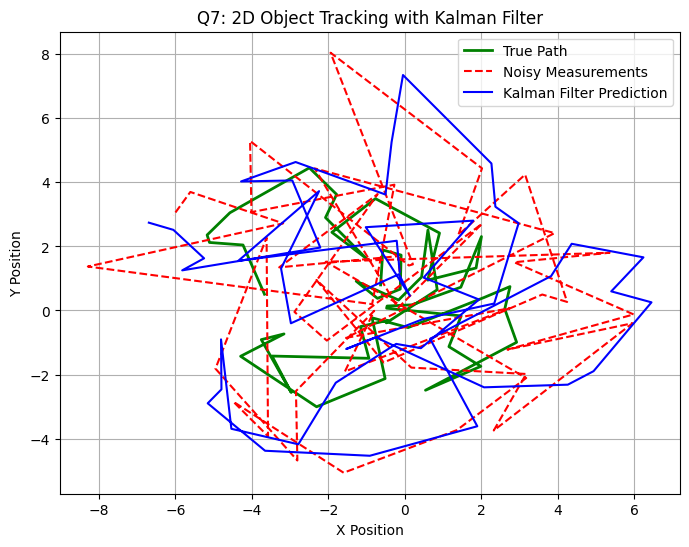

In [39]:
# Q7: Simulate a simple Kalman Filter to track a 2D object's position with random noise.

import numpy as np
import matplotlib.pyplot as plt

# Define Kalman Filter
class KalmanFilter:
    def __init__(self):
        self.state = np.array([[0.], [0.], [0.], [0.]])  # [x, y, dx, dy]
        self.P = np.eye(4) * 1000.0
        self.F = np.array([[1., 0., 1., 0.],
                           [0., 1., 0., 1.],
                           [0., 0., 1., 0.],
                           [0., 0., 0., 1.]])
        self.H = np.array([[1., 0., 0., 0.],
                           [0., 1., 0., 0.]])
        self.R = np.eye(2) * 4.0  # Measurement noise
        self.Q = np.eye(4) * 0.1  # Process noise

    def predict(self):
        self.state = np.dot(self.F, self.state)
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q
        return self.state[:2]

    def update(self, measurement):
        y = measurement - np.dot(self.H, self.state)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))
        self.state = self.state + np.dot(K, y)
        I = np.eye(4)
        self.P = (I - np.dot(K, self.H)).dot(self.P)

# Simulate true object path with noise
true_positions = []
measured_positions = []
predicted_positions = []

kf = KalmanFilter()
pos = np.array([0., 0.])

for _ in range(50):
    pos += np.random.randn(2)  # True movement (random walk)
    measurement = pos + np.random.randn(2) * 2  # Noisy measurement
    
    kf.update(measurement.reshape(2,1))
    pred = kf.predict()

    true_positions.append(pos.copy())
    measured_positions.append(measurement.copy())
    predicted_positions.append(pred.flatten())

# Convert to arrays
true_positions = np.array(true_positions)
measured_positions = np.array(measured_positions)
predicted_positions = np.array(predicted_positions)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(true_positions[:,0], true_positions[:,1], label='True Path', color='green', linewidth=2)
plt.plot(measured_positions[:,0], measured_positions[:,1], label='Noisy Measurements', linestyle='dashed', color='red')
plt.plot(predicted_positions[:,0], predicted_positions[:,1], label='Kalman Filter Prediction', color='blue')
plt.legend()
plt.title("Q7: 2D Object Tracking with Kalman Filter")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()
